In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Creating arrays

In [7]:
a1 = np.array([1,5,3,6])
a2 = np.zeros(10) # creating array filled with 0 values
a3  = np.ones(10) # creating array filled with 1 values
a4  = np.random.random(10) # creating array with random values between 0 and 1
a5  = np.random.randn(10) # creating array with random following a normal distribution (mean=0, sd=1)
a6 = np.linspace(0,np.pi,1000) # creating array with with 1000 values equally spaced comprised between 0 and pi
a7  = np.arange(2,100,2) # creating array with values between 2 and 100 with a step of 2

print(a7)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
 98]


## Array operations

In [20]:
2*a1

array([ 2, 10,  6, 12])

In [21]:
1/a1 + 2

array([3.        , 2.2       , 2.33333333, 2.16666667])

In [22]:
a1>4

array([False,  True, False,  True])

In [23]:
a1[a1>4]

array([5, 6])

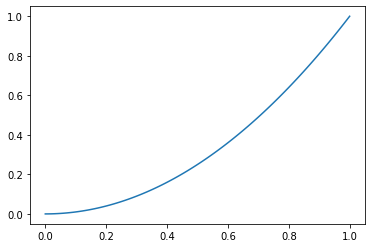

In [25]:
x = np.linspace(0,1,100)
y = x**2
plt.plot(x,y)

(array([1., 1., 1., 0., 2., 1., 3., 0., 0., 1.]),
 array([0.03990936, 0.13156544, 0.22322152, 0.3148776 , 0.40653368,
        0.49818976, 0.58984584, 0.68150192, 0.773158  , 0.86481408,
        0.95647016]),
 <BarContainer object of 10 artists>)

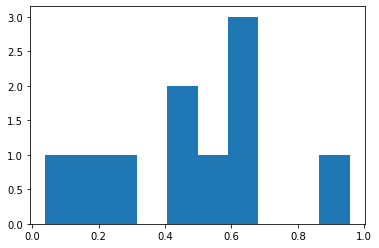

In [26]:
plt.hist(a4)

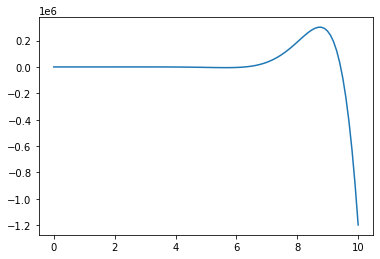

In [28]:
def f(x):
    return x**2 * np.sin(x)/np.exp(-x)
x = np.linspace(0,10,100)
y = f(x)
plt.plot(x,y)

List of many mathematical functions here:
[](https:numpy.org/doc/stable/reference/routines.math.html)

[https:numpy.org/doc/stable/reference/routines.math.html](https:numpy.org/doc/stable/reference/routines.math.html)

## Indexing and Slicing

In [33]:
x = np.array([2,4,6,8,10])

In [34]:
x[2]

6

In [35]:
x[2:] #all elements from index 2

array([ 6,  8, 10])

In [36]:
x[:-2] #all elements except the two last

array([2, 4, 6])

In [37]:
x[1:-2]

array([4, 6])

In [38]:
x>3

array([False,  True,  True,  True,  True])

In [39]:
x[x>3]

array([ 4,  6,  8, 10])

In [45]:
names = np.array(['Jim','Luke','Josh','Penda'])
names

array(['Jim', 'Luke', 'Josh', 'Penda'], dtype='<U5')

In [46]:
np.vectorize(lambda s:s[0])(names)

array(['J', 'L', 'J', 'P'], dtype='<U1')

In [47]:
first_letter_j = np.vectorize(lambda s:s[0])(names)=='J'

In [48]:
#Return names whose first letter are J
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U5')

In [50]:
x[x%4==0]

array([2, 0, 2, 0, 2], dtype=int32)

## Calculus / Statistical Functions

In [56]:
a = 2 * np.random.randn(1000) + 1


* Mean, standard deviation and percentiles of arrays

In [58]:
#mean
np.mean(a)

1.042173617057481

In [57]:
#sd
np.std(a)

1.9876838033246158

In [60]:
# This gives the number such that 80% of values are less than that number
np.percentile(a,80)

2.687200127476022

* Integrals and derivatives

In [70]:
x = np.linspace(1,10,100)
y = 1/x**2 * np.sin(x)

In [75]:
# Compute the gradient with respect to x
dydx = np.gradient(y,x)

In [76]:
np.cumsum([1,2,3,4])

array([ 1,  3,  6, 10], dtype=int32)

In [77]:
# Integral
y_int = np.cumsum(y) * (x[1]-x[0])

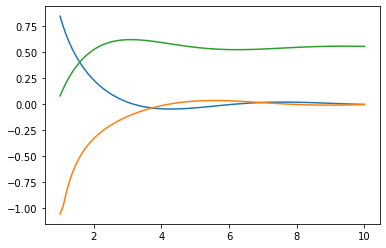

In [78]:
plt.plot(x,y)
plt.plot(x,dydx)
plt.plot(x,y_int)

## Examples

**Question 1**

Let $y = e^{\frac{-x}{10}} \sin(x)$. Consider 1000 $x$ intervals in the range [0,10]

1. Plot the function $y$ vs. $x$ in the range [0,10]
2. Compute the mean and the standard deviation of $y$ for $x$ in [4,7]
3. For $x$ in the range [4,7], find the value $y_m$ such that 80% of $y$ values are less than $y_m$ 
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx$ = 0

In [86]:
x = np.linspace(0,10,1000)
y = np.exp(-x/10) * np.sin(x)

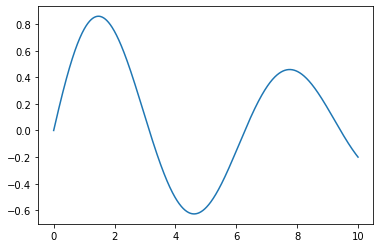

In [87]:
#1
plt.plot(x,y)

In [105]:
#2

#mean
mean = np.mean(y[(x>=4)&(x<=7)])
print(mean)

#sd
sd = np.std(y[(x>=4)&(x<=7)])
print(sd)

-0.2953273365176934
0.3147016786225509


In [106]:
#3
np.percentile(y[(x>=4)&(x<=7)],80)

0.060625057602350874

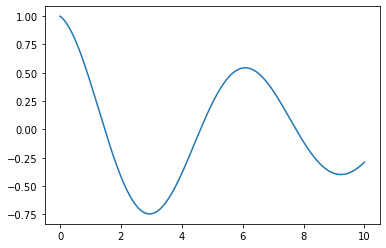

In [102]:
#4
dydx = np.gradient(y,x)
plt.plot(x, dydx)

In [124]:
#5
#x[np.cumproduct(dydx)<0]
x[1:][dydx[1:]*dydx[:-1]<0] # x[1]*x[0], x[2]*x[1] so on and so for

array([1.47147147, 4.61461461, 7.75775776])